In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Reading data from CSV file
df = pd.read_csv("C:/Users/trant/OneDrive/Tài liệu/Đồ án Phân tích dữ liệu/Dataset bank/VCB.VN.csv")

In [3]:
# Extracting 'Close' column as the dependent variable
df_Close = df[['Close']].reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

# Splitting data into train and test sets 
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [5]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluating the model on training data
train_score = model.score(x_train, y_train)
print("Training R-squared:", train_score)

Training R-squared: 0.7105737503646332


In [6]:
# Preparing test data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred = model.predict(x_test)

# Inverse transform to get original scale
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

# Calculating test metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSLE on Test dataset: {test_msle}")

MAPE on Test dataset: 0.0821158397630266
RMSE on Test dataset: 7466498946.36998
MSLE on Test dataset: 0.010012496154674406


In [7]:
# Function to predict closing prices for the next n days
def predict_next_n_days(n):
    last_index = df_Close.index[-1]
    x_next_n_days = np.array(range(last_index + 1, last_index + 1 + n)).reshape(-1, 1)
    y_next_n_days = model.predict(x_next_n_days)
    y_next_n_days = scaler.inverse_transform(np.array([y_next_n_days]).reshape(-1, 1))
    return y_next_n_days

# Predicting the closing prices for the next 30, 60, and 90 days
y_next_30_days = predict_next_n_days(30)
y_next_60_days = predict_next_n_days(60)
y_next_90_days = predict_next_n_days(90)

# Printing the predicted closing prices
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days.flatten())

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days.flatten())

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days.flatten())

# Creating index for the next 30, 60, and 90 days
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
last_date = df['Date'].iloc[-1]

index_next_30_days = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=30).tolist()
index_next_60_days = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=60).tolist()
index_next_90_days = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=90).tolist()

Predicted closing prices for the next 30 days:
[8.38698573e+10 8.38997485e+10 8.39296398e+10 8.39595311e+10
 8.39894223e+10 8.40193136e+10 8.40492049e+10 8.40790961e+10
 8.41089874e+10 8.41388787e+10 8.41687700e+10 8.41986612e+10
 8.42285525e+10 8.42584438e+10 8.42883350e+10 8.43182263e+10
 8.43481176e+10 8.43780088e+10 8.44079001e+10 8.44377914e+10
 8.44676826e+10 8.44975739e+10 8.45274652e+10 8.45573565e+10
 8.45872477e+10 8.46171390e+10 8.46470303e+10 8.46769215e+10
 8.47068128e+10 8.47367041e+10]
Predicted closing prices for the next 60 days:
[8.38698573e+10 8.38997485e+10 8.39296398e+10 8.39595311e+10
 8.39894223e+10 8.40193136e+10 8.40492049e+10 8.40790961e+10
 8.41089874e+10 8.41388787e+10 8.41687700e+10 8.41986612e+10
 8.42285525e+10 8.42584438e+10 8.42883350e+10 8.43182263e+10
 8.43481176e+10 8.43780088e+10 8.44079001e+10 8.44377914e+10
 8.44676826e+10 8.44975739e+10 8.45274652e+10 8.45573565e+10
 8.45872477e+10 8.46171390e+10 8.46470303e+10 8.46769215e+10
 8.47068128e+10 8.47

C:\Users\trant\AppData\Local\Temp\ipykernel_24268\3832513807.py:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
C:\Users\trant\AppData\Local\Temp\ipykernel_24268\3832513807.py:25: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


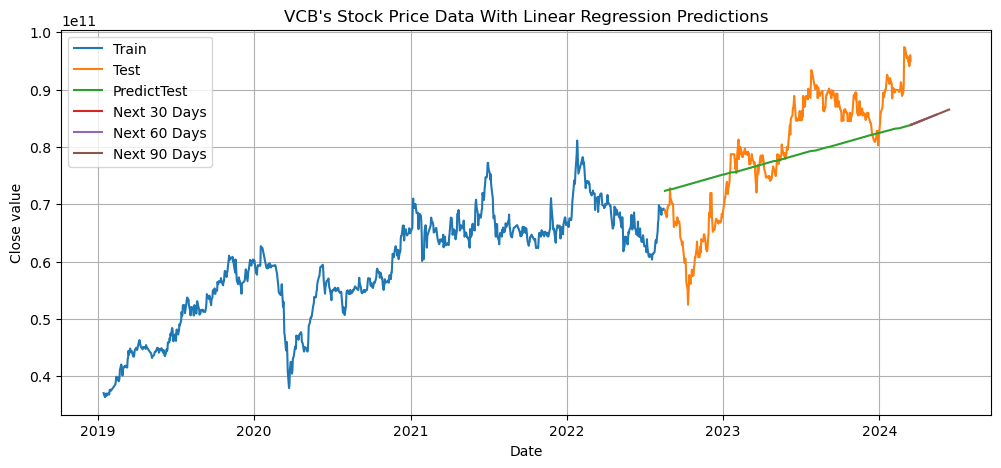

In [8]:
# Plotting
plt.figure(figsize=(12, 5))

plt.plot(df['Date'][:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)), label='Train')
plt.plot(df['Date'][train_size:], y_test, label='Test')
plt.plot(df['Date'][train_size:], y_pred, label='PredictTest')
plt.plot(index_next_30_days, y_next_30_days, label='Next 30 Days')
plt.plot(index_next_60_days, y_next_60_days, label='Next 60 Days')
plt.plot(index_next_90_days, y_next_90_days, label='Next 90 Days')

plt.legend()
plt.grid()
plt.title("VCB's Stock Price Data With Linear Regression Predictions")

plt.xlabel("Date")
plt.ylabel("Close value")

plt.show()
